<a href="https://colab.research.google.com/github/DavyL0/Data-Analize-Bank/blob/main/mod12_ex03_regressa%CC%83o_mu%CC%81ltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
y, X = patsy.dmatrices('tip ~ sex + smoker + size + total_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  total_bill
          1              1             1     2       16.99
          1              0             1     3       10.34
          1              0             1     3       21.01
          1              0             1     2       23.68
          1              1             1     4       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [ ]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  size  total_bill
          0            1             1     2       16.99
          1            0             1     3       10.34
          1            0             1     3       21.01
          1            0             1     2       23.68
          0            1             1     4       24.59
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [ ]:
y, X = patsy.dmatrices('tip ~ sex  + C(size) + total_bill', tips[:5])
y,X = patsy.dmatrices('tip ~ sex  + time + sex*time', tips[:5])
y, X = patsy.dmatrices('tip ~ sex:time + 0', tips[:5])

In [ ]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.260
Method:                 Least Squares   F-statistic:                    0.1748
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.704
Time:                        15:23:30   Log-Likelihood:                -7.3001
No. Observations:                   5   AIC:                             18.60
Df Residuals:                       3   BIC:                             17.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
sex[Male]:time[Lunch]             0          0        nan        nan           0           0
sex[Female]:time[Lunch]           0          0        nan        nan           0           0
sex[Male]:time[Dinner]       2.8233      0.777      3.635      0.036       0.352       5.295
sex[Female]:time[Dinner]     2.3100      0.951      2.429      0.093      -0.717       5.337
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.756
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.619
Skew:                          -0.203   Prob(JB):                        0.734
Kurtosis:                       1.325   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
results = smf.ols('''
                    tip ~ sex
                                + size
                                + np.log(total_bill+.1)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     64.17
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.68e-30
Time:                        15:38:04   Log-Likelihood:                -353.09
No. Observations:                 244   AIC:                             714.2
Df Residuals:                     240   BIC:                             728.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.7805      0.473     -5.876      0.000      -3.713      -1.848
sex[T.Female]               0.0323      0.140      0.230      0.818      -0.244       0.309
size                        0.2298      0.087      2.652      0.009       0.059       0.400
np.log(total_bill + .1)     1.7873      0.191      9.382      0.000       1.412       2.163
==============================================================================
Omnibus:                       57.319   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.115
Skew:                           1.005   Prob(JB):                     5.15e-37
Kurtosis:                       6.521   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

In [ ]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.67e-21
Time:                        15:44:21   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

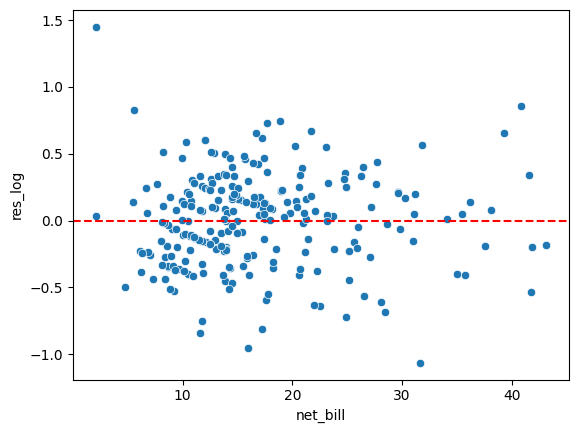

In [ ]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
results = smf.ols('''
                    np.log(tip) ~ sex
                                + size
                                + net_bill
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     42.78
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           3.49e-22
Time:                        15:48:00   Log-Likelihood:                -90.999
No. Observations:                 244   AIC:                             190.0
Df Residuals:                     240   BIC:                             204.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3385      0.071      4.748      0.000       0.198       0.479
sex[T.Female]     0.0015      0.048      0.032      0.974      -0.093       0.096
size              0.1094      0.029      3.733      0.000       0.052       0.167
net_bill          0.0228      0.003      6.520      0.000       0.016       0.030
==============================================================================
Omnibus:                        0.912   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.772
Skew:                          -0.137   Prob(JB):                        0.680
Kurtosis:                       3.037   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.67e-21
Time:                        15:49:38   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = smf.ols('np.log(tip) ~ C(size) + np.power(net_bill,1)', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     22.00
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.56e-20
Time:                        15:50:51   Log-Likelihood:                -89.247
No. Observations:                 244   AIC:                             192.5
Df Residuals:                     237   BIC:                             217.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1860      0.178      1.044      0.298      -0.165       0.537
C(size)[T.2]              0.3860      0.181      2.128      0.034       0.029       0.743
C(size)[T.3]              0.5162      0.192      2.682      0.008       0.137       0.895
C(size)[T.4]              0.6192      0.197      3.136      0.002       0.230       1.008
C(size)[T.5]              0.5685      0.248      2.295      0.023       0.080       1.057
C(size)[T.6]              0.7993      0.264      3.030      0.003       0.280       1.319
np.power(net_bill, 1)     0.0221      0.004      6.309      0.000       0.015       0.029
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.652
Skew:                          -0.127   Prob(JB):                        0.722
Kurtosis:                       3.004   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
r = tips[['res_log', 'tip']].corr().iloc[0,1]

r**2

0.5700523119352525

In [ ]:
r = tips[['res', 'tip']].corr().iloc[0,1]

r**2

0.704228416800376

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
pr = pd.read_csv('previsao_de_renda.csv')
pr.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [ ]:
reg = smf.ols('renda ~ tempo_emprego', data = pr).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:11:32   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PatsyError: Error evaluating factor: NameError: name 'renda' is not defined
    np.log(renda) ~ C(idade) + np.power(tempo_emprego)
    ^^^^^^^^^^^^^